In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics


GETTING THE DATASET 

In [7]:
dataset = pd.read_csv("Dataset/output.csv")

In [9]:
dataset

,Year,City,Population (in Lakhs) (2011)+,Murder,Kidnapping,Crime against women,Crime against children,Crime Committed by Juveniles,Crime against Senior Citizen,Crime against SC,Crime against ST,Economic Offences,Cyber Crimes
0,2014,Ahmedabad,63.5,82,367,1371,437,215,68,66,6,399,32
1,2015,Ahmedabad,63.5,94,332,1067,609,157,17,60,9,378,28
2,2016,Ahmedabad,63.5,103,376,1126,481,258,362,96,10,479,77
3,2017,Ahmedabad,63.5,90,263,1405,600,405,534,119,6,608,112
4,2018,Ahmedabad,63.5,98,277,1416,733,352,733,145,9,842,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2017,Surat,45.8,89,332,559,526,436,131,32,10,719,105
148,2018,Surat,45.8,108,373,712,1075,409,161,29,13,829,155
149,2019,Surat,45.8,97,358,1015,770,516,232,34,19,804,228
150,2020,Surat,45.8,116,163,633,419,298,69,20,12,401,204


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           152 non-null    int64  
 1   City                           152 non-null    object 
 2   Population (in Lakhs) (2011)+  152 non-null    float64
 3   Murder                         152 non-null    int64  
 4   Kidnapping                     152 non-null    int64  
 5   Crime against women            152 non-null    int64  
 6   Crime against children         152 non-null    int64  
 7   Crime Committed by Juveniles   152 non-null    int64  
 8   Crime against Senior Citizen   152 non-null    int64  
 9   Crime against SC               152 non-null    int64  
 10  Crime against ST               152 non-null    int64  
 11  Economic Offences              152 non-null    int64  
 12  Cyber Crimes                   152 non-null    int

DATASET INFORMATION 


*  In this study, the data has been collected from the **National Crime Records Bureau (NCRB)**, India.
*  The data provides statistics on the number of crimes commited in **19 metropolitan cities** during the year **2014 to 2021**.
*  The 19 metropolitan cities are:
    *  Ahmedabad        *  Bengaluru        *  Chennai   
    *  Coimbatore       *  Delhi            *  Ghaziabad 
    *  Hyderabad        *  Indore           *  Jaipur    
    *  Kanpur           *  Kochi            *  Kolkata   
    *  Kozhikode        *  Lucknow          *  Mumbai    
    *  Nagpur           *  Patna            *  Pune      
    *  Surat                                             
*  It contains the records of the 10 different category of crimes commited namely:
    *  Murder                               *  Kidnapping                   
    *  Crime against women                  *  Crime against children       
    *  Crime Committed by Juveniles         *  Crime against Senior Citizen 
    *  Crime against SC                     *  Crime against ST             
    *  Economic Offences                    *  Cyber Crimes                 


DATA VISUALISATION

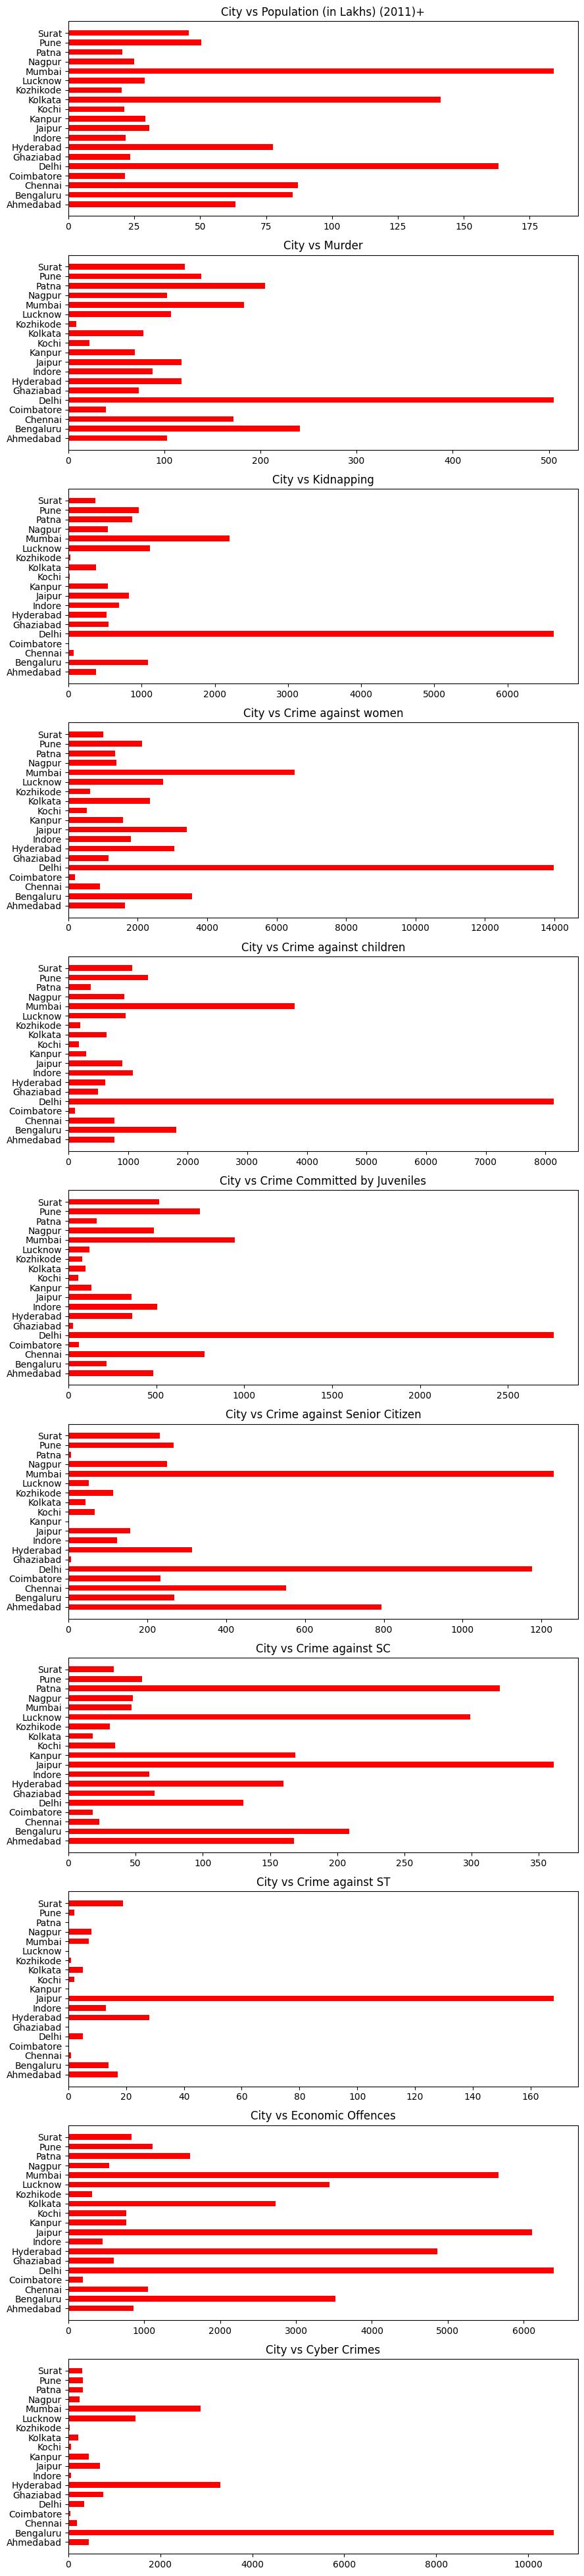

In [8]:
fig, ax = plt.subplots(11, 1, figsize=(10, 50))

for i in range(0, 11):
    ax[i].barh(dataset['City'], dataset[dataset.columns[i+2]], 0.6, color='Red')
    ax[i].set_title('City vs ' + dataset.columns[i+2])
plt.show()


NEW DATASET CREATION

In [9]:
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Type'])
for i in range(3, 13):
    temp = dataset[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[[dataset.columns[i]]]
    temp['Type'] = dataset.columns[i]
    
    new_df = pd.concat([new_df, temp])

C:\Users\Shivani Mishra\AppData\Local\Temp\ipykernel_11456\2150212361.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, temp])


In [13]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes
148,2018,Surat,45.8,155,Cyber Crimes
149,2019,Surat,45.8,228,Cyber Crimes
150,2020,Surat,45.8,204,Cyber Crimes



DATA PRE-PROCESSING



The number of cases in each crime category column will be transformed into the crime rate per population(in lakhs).<br>
Crime Rate = Total Crime Cases / Population (in Lakhs)


In [10]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Lakhs) (2011)+']

In [15]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type,Crime Rate
0,2014,Ahmedabad,63.5,82,Murder,1.291339
1,2015,Ahmedabad,63.5,94,Murder,1.480315
2,2016,Ahmedabad,63.5,103,Murder,1.622047
3,2017,Ahmedabad,63.5,90,Murder,1.417323
4,2018,Ahmedabad,63.5,98,Murder,1.543307
...,...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes,2.292576
148,2018,Surat,45.8,155,Cyber Crimes,3.384279
149,2019,Surat,45.8,228,Cyber Crimes,4.978166
150,2020,Surat,45.8,204,Cyber Crimes,4.454148



As the Number Of Cases Column is obsolete, it should be dropped

In [11]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [17]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
147,2017,Surat,45.8,Cyber Crimes,2.292576
148,2018,Surat,45.8,Cyber Crimes,3.384279
149,2019,Surat,45.8,Cyber Crimes,4.978166
150,2020,Surat,45.8,Cyber Crimes,4.454148


In [12]:
# saving the new dataset as an excel file
new_df.to_csv("Dataset/output2.csv")

LOADING THE NEW DATASET


In [13]:
new_dataset = pd.read_csv("Dataset/output2.csv")

In [29]:
new_dataset

,Unnamed: 0,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,0,2014,Ahmedabad,63.5,Murder,1.291339
1,1,2015,Ahmedabad,63.5,Murder,1.480315
2,2,2016,Ahmedabad,63.5,Murder,1.622047
3,3,2017,Ahmedabad,63.5,Murder,1.417323
4,4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...,...
1515,147,2017,Surat,45.8,Cyber Crimes,2.292576
1516,148,2018,Surat,45.8,Cyber Crimes,3.384279
1517,149,2019,Surat,45.8,Cyber Crimes,4.978166
1518,150,2020,Surat,45.8,Cyber Crimes,4.454148


In [30]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1520 non-null   int64  
 1   Year                           1520 non-null   int64  
 2   City                           1520 non-null   object 
 3   Population (in Lakhs) (2011)+  1520 non-null   float64
 4   Type                           1520 non-null   object 
 5   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 71.4+ KB


In [31]:
new_dataset.describe()

,Unnamed: 0,Year,Population (in Lakhs) (2011)+,Crime Rate
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,75.500000,2017.500000,60.015789,11.581238
std,43.892111,2.292042,50.006465,19.529756
min,0.000000,2014.000000,20.300000,0.000000
25%,37.750000,2015.750000,21.700000,0.943396
50%,75.500000,2017.500000,30.700000,4.065514
75%,113.250000,2019.250000,85.000000,14.486662
max,151.000000,2021.000000,184.100000,198.925081


The data is clean with no null values with column city and type as object/categorical Dtype.


*Label Encoding

Since two columns in our dataset has categorical values i.e City and Type.
Thus, to make them machine-readable, we must convert them to numeric labels.

In [14]:
le = LabelEncoder()

In [15]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [16]:
# Saving the mapping file for further use
file = open('Mappings/City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [17]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [18]:
# Saving the mapping file for further use
file = open('Mappings/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Committed by Juveniles - 0

Crime against SC - 1

Crime against ST - 2

Crime against Senior Citizen - 3

Crime against children - 4

Crime against women - 5

Cyber Crimes - 6

Economic Offences - 7

Kidnapping - 8

Murder - 9



In [37]:
new_dataset

,Unnamed: 0,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,0,2014,0,63.5,9,1.291339
1,1,2015,0,63.5,9,1.480315
2,2,2016,0,63.5,9,1.622047
3,3,2017,0,63.5,9,1.417323
4,4,2018,0,63.5,9,1.543307
...,...,...,...,...,...,...
1515,147,2017,18,45.8,6,2.292576
1516,148,2018,18,45.8,6,3.384279
1517,149,2019,18,45.8,6,4.978166
1518,150,2020,18,45.8,6,4.454148


 
SPLITTING OF DATASET FOR TRAINING / TESTING


In [19]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[0.000e+00, 2.014e+03, 0.000e+00, 6.350e+01],
       [1.000e+00, 2.015e+03, 0.000e+00, 6.350e+01],
       [2.000e+00, 2.016e+03, 0.000e+00, 6.350e+01],
       ...,
       [1.490e+02, 2.019e+03, 1.800e+01, 4.580e+01],
       [1.500e+02, 2.020e+03, 1.800e+01, 4.580e+01],
       [1.510e+02, 2.021e+03, 1.800e+01, 4.580e+01]])

In [20]:
y = new_dataset['Crime Rate'].values
y

array([1.29133858, 1.48031496, 1.62204724, ..., 4.97816594, 4.45414847,
       6.4628821 ])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [22]:
x_train

array([[  68. , 2018. ,    8. ,   30.7],
       [  97. , 2015. ,   12. ,   20.3],
       [  40. , 2014. ,    5. ,   23.6],
       ...,
       [  97. , 2015. ,   12. ,   20.3],
       [ 109. , 2019. ,   13. ,   29. ],
       [ 136. , 2014. ,   17. ,   50.5]])

In [23]:
y_train

array([ 5.86319218,  0.98522167,  2.58474576, ..., 12.95566502,
        2.5862069 ,  2.77227723])

MODEL CREATION



Support Vector Machine


In [24]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.30189876589052
Mean Squared Error: 370.91543749114845
R2 score: -0.17609313551219552


Nearest Neighbour 

In [26]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 12.85131243797114
Mean Squared Error: 427.46483828547736
R2 score: -0.35539913189075056



Decision Tree Regressor


In [28]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 12.51400076144188
Mean Squared Error: 341.88297843716407
R2 score: -0.08403744747886899


Random Forest Regressor


In [30]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 12.422673420559029
Mean Squared Error: 336.61645238924194
R2 score: -0.06733842525738165



Neural Networks MLPRegressor


In [32]:
model5 = MLPRegressor(random_state=0)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.081585834593964
Mean Squared Error: 317.48772207664103
R2 score: -0.006685332563576507


CONCLUSION:
    The Neural Networks MLPRegressor model demonstrates the best accuracy in predicting test data among the five selected models.


SAVING THE MODEL


In [34]:
import pickle

In [40]:
#saving the model as .pkl file
pkl_filename = "Model/model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [41]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

-0.06733842525738165


C:\Users\Shivani Mishra\AppData\Local\Temp\ipykernel_11456\1630152072.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(metric.keys(), rotation=45)
C:\Users\Shivani Mishra\AppData\Local\Temp\ipykernel_11456\1630152072.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(metric.keys(), rotation=45)
C:\Users\Shivani Mishra\AppData\Local\Temp\ipykernel_11456\1630152072.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(metric.keys(), rotation=45)


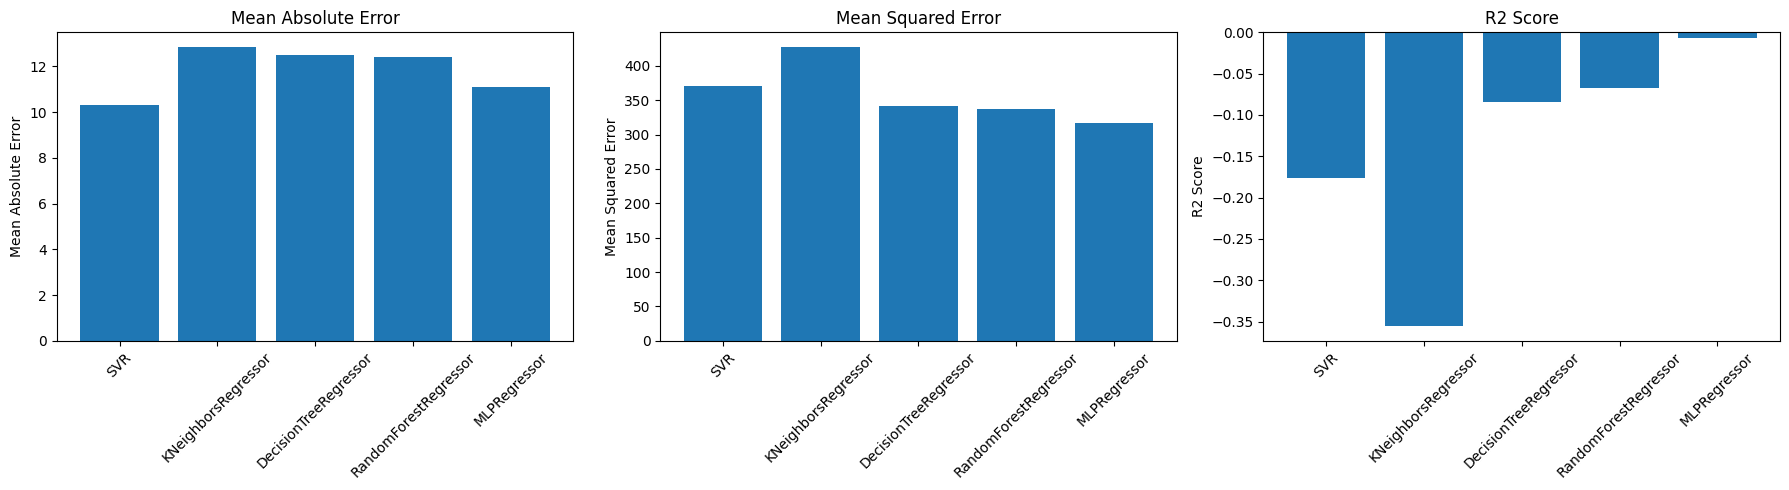

In [37]:
models = {
    'SVR': svm.SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=2),
    'DecisionTreeRegressor': tree.DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=0),
    'MLPRegressor': MLPRegressor(random_state=0)
}
# Initialize dictionaries to store metrics
mae = {}
mse = {}
r2 = {}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae[name] = metrics.mean_absolute_error(y_test, y_pred)
    mse[name] = metrics.mean_squared_error(y_test, y_pred)
    r2[name] = metrics.r2_score(y_test, y_pred)

# Plotting the results
metrics_names = ['Mean Absolute Error', 'Mean Squared Error', 'R2 Score']
metrics_data = [mae, mse, r2]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics_data):
    axs[i].bar(metric.keys(), metric.values())
    axs[i].set_title(metrics_names[i])
    axs[i].set_ylabel(metrics_names[i])
    axs[i].set_xticklabels(metric.keys(), rotation=45)

plt.tight_layout()
plt.show()